In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rutinasLE_Arb as ru

from scipy.interpolate import interp1d
from scipy.integrate import quad, solve_ivp

In [2]:
# Resolución de ecuaciones del fondo
nodos, ell = 0, 2

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)#, Nptos=900, #1800 Rtol=1e-11, Atol=1e-12
                                                           #Rtol=1e-11, Atol=1e-12) # no escalada #1500 2500

Finding a profile with  0 nodes
Maxima precisión alcanzada 0.10179680808153946 radio 23.18182101984913
masa  -11.037586744763619 Uf  -0.47613113462108214

E(U(inf))  -0.2408025879999024
energía =  -0.6770158744836592 $\lambda = $ 0.4529975350109142

Checking normalización,  1.0000000003439213 1


checking  -1.6495944315174458 11.037587739760035 0.01232096267039339 -0.6770158689545379

Plot shooting y extensión


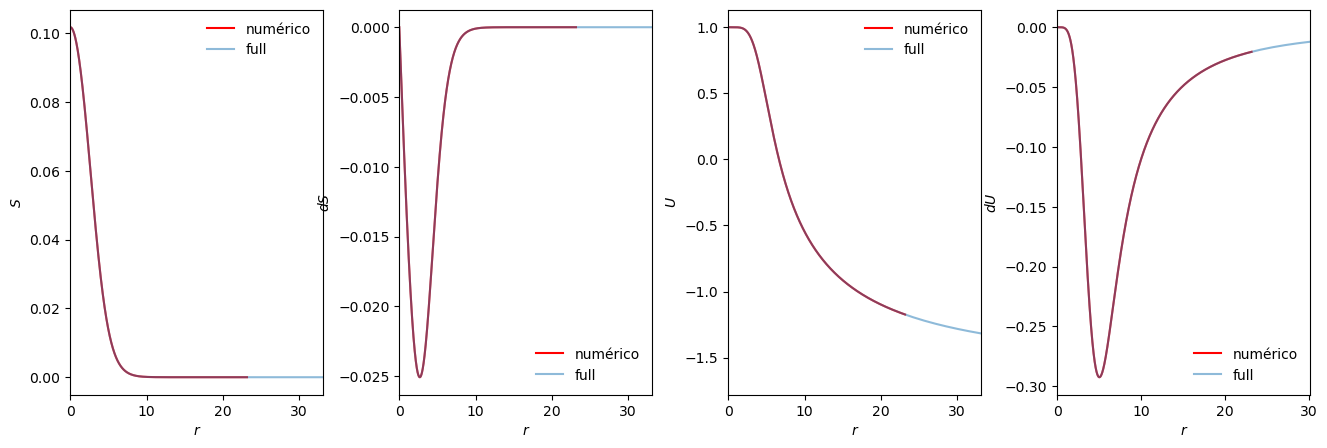

Checking normalización, 1.000000008484075 1
Checking convergencia de la Energía U(inf), U(asint) -0.6763707056609007 -0.6770158744836592

Plot extensión normalizada y interpolación


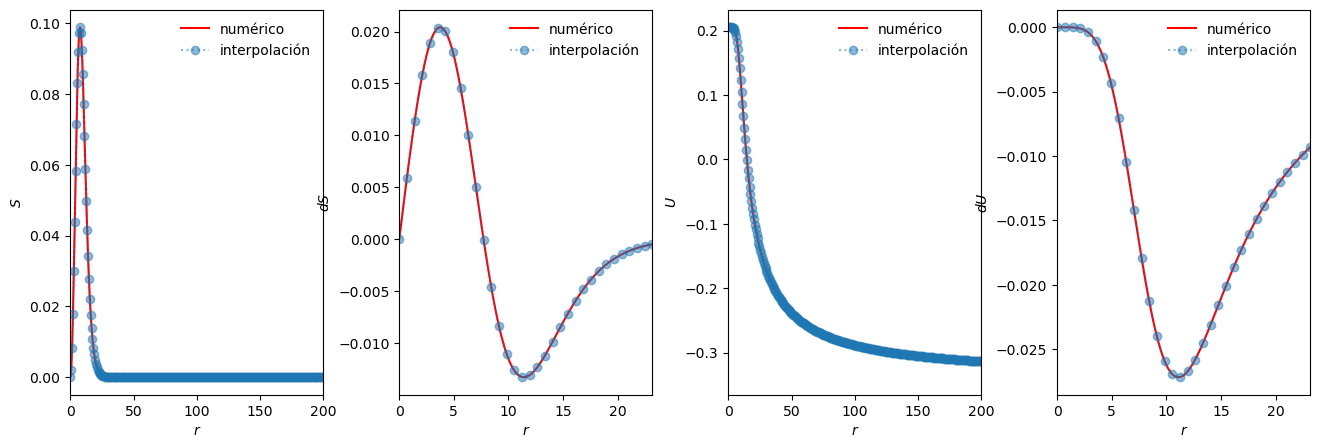

In [3]:
# extendiendo soluciones
Ext = 7000
Np = 4800

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD[:-160], sD[:-160], 
                                                dsD[:-160], uD[:-160], duD[:-160], Ext, Np)

# graficando
yceros = np.zeros(len(cer0))
rad = np.linspace(rD[-1], rD[-1]+Ext, 1000)

print('')
print('Plot shooting y extensión')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(rD[:-1], sD[:-1], ls='-', c='red', label='numérico') 
#ax[0].plot(rad, sigm(rad, Ap, k), ls=':', c='red', label='extensión') 
ax[0].plot(rDnew, sDnew, ls='-', alpha=0.5, label='full') 
ax[0].plot(cer0, yceros, 'ko')

ax[0].set_xlim(rD[0], rD[-1]+10)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)
#ax[0].set_yscale('log')

ax[1].plot(rD[:-1], dsD[:-1], ls='-', c='red', label='numérico') 
#ax[1].plot(rad, dsigm(rad, Ap, k), ls=':', c='red',label='extensión') 
ax[1].plot(rDnew, dsDnew, ls='-', alpha=0.5, label='full') 

ax[1].set_xlim(rD[0], rD[-1]+10)
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(rD, uD, ls='-', c='red', label='numérico') 
#ax[2].plot(rad, Up(rad, AA, BB), ls=':', c='red',label='extensión')
ax[2].plot(rDnew, uDnew, ls='-', alpha=0.5, label='full') 

ax[2].set_xlim(rD[0], rD[-1]+10)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].plot(rD, duD, ls='-', c='red', label='numérico')  
#ax[3].plot(rad, dUp(rad, BB), ls=':',c='red', label='extensión') 
ax[3].plot(rDnew, duDnew, ls='-', alpha=0.5, label='full')

ax[3].set_xlim(rD[0], rD[-1]+7)
ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

plt.show()

# normalizando

# reescalando
xN = rDnew/lam
sN = (rDnew**ell*sDnew)*lam**2
dsN = rDnew**(ell-1)*(ell*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

# graficando
LL = 200*(nodos+1) #200
rad = np.linspace(0, rDnew[-1], 10000)

print('')
print('Plot extensión normalizada y interpolación')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(xN, sN, ls='-', c='red', label='numérico') 
ax[0].plot(rad, fsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[0].set_xlim(0, LL)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)

ax[1].plot(xN, dsN, ls='-', c='red', label='numérico') 
ax[1].plot(rad, fdsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[1].set_xlim(0, rD[-1])
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(xN, uN, ls='-', c='red', label='numérico') 
ax[2].plot(rad, fuN(rad), ':o', alpha=0.5, label='interpolación') 

ax[2].set_xlim(0, LL)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].set_xlim(0, rD[-1])
ax[3].plot(xN, duN, ls='-', c='red', label='numérico')  
ax[3].plot(rad, fduN(rad), ':o', alpha=0.5, label='interpolación') 

ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

In [4]:
datos = []
for i in rspan:
    p, u = fsN(i), fuN(i)
    datos.append([i, p, u])
    
datos = np.array(datos)
np.savetxt('perfilell2.dat', datos)

NameError: name 'rspan' is not defined

In [4]:
# Calculando los autovalores (Espectro)
Jval = range(0, 3)  # momento angular de la perturbación 

rMax = 200*(nodos+1) 
Nptos = int(3*rMax/4) + 200

datFunc = [fsN, fuN]

# cada fila es un valor de Nptos y columna J
Auto_Valores, Auto_Funciones = [], []
for J in Jval:
    util = [ell, J, Nptos, rMax]
    lambd, _, Vecto_Full, _ = ru.espectro(datFunc, util)

    #### Separando los Autovalores ######
    jj = np.real(lambd)!=0  # reales
    autoval_Real = lambd[jj]
    print('Autovalores con part. Real para J=%d, Npt.=%d -> '%(J, Nptos), autoval_Real)
    
    if len(autoval_Real)!=0:
        temp = len(autoval_Real)
        name = 'data_l%d_J%d.dat'%(ell, J)
        data = np.array([[J]*temp, autoval_Real.real, autoval_Real.imag]).T
        np.savetxt(name, data)
    ###############

    ###### Organizando de menor a mayor los autovalores #####
    indF = ru.menor(lambd).astype(int)
    autova_Organ = lambd[indF]

    ###### Salvando  #####
    Auto_Valores.append(autova_Organ)
    Auto_Funciones.append(Vecto_Full[:, indF])

Autovalores con part. Real para J=0, Npt.=350 ->  []
Autovalores con part. Real para J=1, Npt.=350 ->  []
Autovalores con part. Real para J=2, Npt.=350 ->  [-6.44373293e-03-6.42923213e-13j -4.32121042e-07-1.86101328e-15j
  4.32121042e-07-1.86101328e-15j  6.44373293e-03-6.42923213e-13j]


In [5]:
autDat = 10  # numero de autovalores que se mostrarán
k = 0
for J in Jval:
    print('Autovalores para J -> %d'%J)
    print('') 
    print(Auto_Valores[k][:autDat])
    print('')
    k += 1

Autovalores para J -> 0

[-0.-8.76630120e-06j  0.+8.76630122e-06j  0.+6.40869494e-02j
 -0.-6.40869494e-02j -0.-1.65759053e-01j  0.+1.65759053e-01j
  0.+2.12335564e-01j -0.-2.12335564e-01j  0.+2.41939668e-01j
 -0.-2.41939668e-01j]

Autovalores para J -> 1

[ 0.+0.00111802j -0.-0.00111802j -0.-0.05842642j  0.+0.05842642j
 -0.-0.07777395j  0.+0.07777395j  0.+0.13476859j -0.-0.13476859j
  0.+0.14151232j -0.-0.14151232j]

Autovalores para J -> 2

[-4.32121042e-07-1.86101328e-15j  4.32121042e-07-1.86101328e-15j
 -6.44373293e-03-6.42923213e-13j  6.44373293e-03-6.42923213e-13j
  0.00000000e+00+1.02379351e-01j -0.00000000e+00-1.02379351e-01j
 -0.00000000e+00-1.05863348e-01j  0.00000000e+00+1.05863348e-01j
 -0.00000000e+00-1.08244706e-01j  0.00000000e+00+1.08244706e-01j]



In [6]:
J = 2
autoV = 2
utilez = [ell, Nptos, rMax]
c1, Lval, r_dis, datA, datB = ru.VectoresAB(J, autoV, Auto_Funciones, Auto_Valores, utilez)

Número de L  3  ->  [0 2 4]
Autovalor estudiado  (-0.006443732933821609-6.429232125489419e-13j)


Text(2.8, 0.06, '$\\lambda=-0.00644373 \\times 1/t_c$')

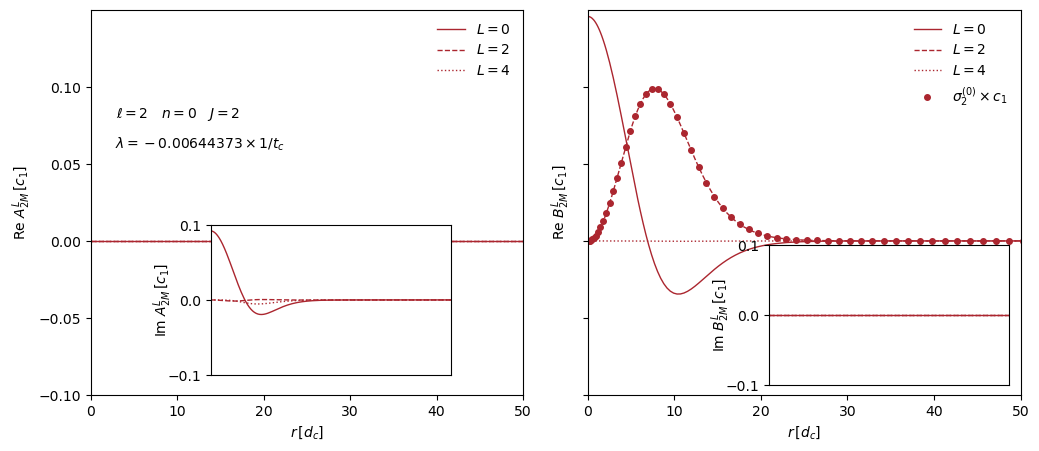

In [7]:
ellPos = 1
cte = fsN(r_dis[1:Nptos]).max()/np.abs(datB[ellPos]).max()

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

Ls = ['-', '--', ':', '.-']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.15))

left, bottom, width, height = [0.225, 0.15, 0.2, 0.3]
ax1 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.69, 0.13, 0.2, 0.28]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(c1):
    ax[0].plot(r_dis[1:Nptos], np.real(datA[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax1.plot(r_dis[1:Nptos], np.imag(datA[i]*cte),  ls=Ls[i], lw=1, 
             c=col[3])

    ax[1].plot(r_dis[1:Nptos], np.real(datB[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax2.plot(r_dis[1:Nptos], np.imag(datB[i]*cte), ls=Ls[i], lw=1, 
             c=col[3])

ax[1].plot(r_dis[1:Nptos][::2], fsN(r_dis[1:Nptos][::2]), ls='', marker='o', markersize=4, #mfc='white',
           color=col[3], label=r'$\sigma_{%d}^{(0)} \times c_1$'%ell)

ax[0].set_xlabel(r'$r \, [d_c]$')
ax[1].set_xlabel(r'$r \, [d_c]$')
ax[0].set_ylabel(r'Re $A_{%d M}^{L}\,[c_1]$'%J)
ax[1].set_ylabel(r'Re $B_{%d M}^{L} \,[c_1]$'%J, labelpad=8)
ax1.set_ylabel(r'Im $A_{%d M}^{L} \,[c_1]$'%J, labelpad=-5)
ax2.set_ylabel(r'Im $B_{%d M}^{L} \,[c_1]$'%J, labelpad=-5)

ax[0].set_xlim(0, 50)
ax[1].set_xlim(0, 50)
ax1.set_xlim(0, 50)
ax2.set_xlim(0, 50)

ax[0].set_ylim(-0.1, 0.15)
ax1.set_ylim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)

ax[0].set_yticks([-0.1, -0.05, 0, 0.05, 0.1])
ax1.set_yticks([-0.1, 0,  0.1])
ax2.set_yticks([-0.1, 0,  0.1])

ax1.set_xticks([])
ax2.set_xticks([])

ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

ax[0].text(x=3, y= 0.08, s=r'$\ell=%d \quad n=%d \quad J=%d$'%(ell, nodos, J))
ax[0].text(x=2.8, y= 0.06, s=r'$\lambda=%9.8f \times 1/t_c$'%np.real(Auto_Valores[J][autoV]))

In [9]:
def X1Val(datosA, Jval, Nptos, fsN, checking=True):
    """
    x11 -> 2*trian^{-1}(sig0*r^{J-2}*A^{J−2}), 
    x12 -> 2*trian^{-1}(sig0*r^{J}*A^{J}), 
    x13 -> 2*trian^{-1}(sig0*r^{J+2}*A^{J+2})
    """
    ###################################
    ###  Idetifiying the c_1 value
    ##################################
    c1 = J+1 if J<ell else ell+1
    Lmin, Lmax = abs(J-ell), J+ell
    Lval = np.arange(Lmin, Lmax+1, 2, dtype=int)  # L values
    if checking==True:
        print(r'$c_1$-values $\to$ ', c1, r"check ", len(Lval)==c1)  # checking

    # calculando matriz de derivada
    D_chev, x_chev = ru.cheb(Nptos)
    # rescalando la distancia de [0, L] -> [-1, 1]. Recordar x=2(r/L)-1
    r_dis = np.array([(-x_chev[i]+1)*rMax/2. for i in range(Nptos+1)])
    r_dis2 = np.copy(r_dis[1:Nptos])

    # utilez
    Di_chev = D_chev[1:Nptos, 1:Nptos]  # ignoramos primera (indice 0) y última fila, así como primera y última columna
    D2_chev = np.dot(D_chev, D_chev)/((rMax/2)**2)  # Calculando D^2. Rescalando D_[0, L] = D[-1, 1]/(L/2)
    D2i_chev = np.copy(D2_chev[1:Nptos, 1:Nptos])  # ignoramos primera (indice 0) y última fila, así como primera y última columna
    
    R1 = np.diag(2./r_dis2)  # Rm=2/r
    R2 = np.diag(1./r_dis2**2)  # Rm=1/r^2
    #####
    rcomp = [np.diag(r_dis2)**Lval[i] for i in range(c1)]
    RMat = ru.block_diag_view(rcomp)
    
    ####
    Sigma0 = np.diag(fsN(r_dis2))  # sigma_ell^{0}
    temp = [Sigma0]*c1
    Sigma = ru.block_diag_view(temp)
    
    ######
    MD = 2*np.dot(Sigma, np.dot(RMat, datosA))

    # construyendo operador triangulo
    TrianComp = [D2i_chev + np.dot(R1, Di_chev)-Jval*(Jval+1)*R2]*c1
    TrianJ = ru.block_diag_view(TrianComp)
    TrianJInv = np.linalg.inv(TrianJ)  # Operador triangulo a la menos uno
    
    X1Val = np.dot(TrianJInv, MD)
    
    x1comp = []
    for i in range(c1):
        tempx1 = X1Val[i*(Nptos-1):(i+1)*(Nptos-1)]
        
        x1comp.append(tempx1)
        
    return x1comp

In [10]:
def X1Val0(datosA, Jval, Nptos, fsN):
    """
    x11 -> 2*trian^{-1}(sig0*r^{J-2}*A^{J−2}), 
    x12 -> 2*trian^{-1}(sig0*r^{J}*A^{J}), 
    x13 -> 2*trian^{-1}(sig0*r^{J+2}*A^{J+2})
    """

    # calculando matriz de derivada
    D_chev, x_chev = ru.cheb(Nptos)
    # rescalando la distancia de [0, L] -> [-1, 1]. Recordar x=2(r/L)-1
    r_dis = np.array([(-x_chev[i]+1)*rMax/2. for i in range(Nptos+1)])
    r_dis2 = np.copy(r_dis[1:Nptos])

    # utilez
    Di_chev = D_chev[1:Nptos, 1:Nptos]  # ignoramos primera (indice 0) y última fila, así como primera y última columna
    R1 = np.diag(2./r_dis2)  # Rm=2/r
    R2 = np.diag(1./r_dis2**2)  # Rm=1/r^2
    D2_chev = np.dot(D_chev, D_chev)/((rMax/2)**2)  # Calculando D^2. Rescalando D_[0, L] = D[-1, 1]/(L/2)
    D2i_chev = np.copy(D2_chev[1:Nptos, 1:Nptos])  # ignoramos primera (indice 0) y última fila, así como primera y última columna
    Sigma0 = np.diag(fsN(r_dis2))  # sigma_ell^{0}

    # construyendo operador triangulo
    TrianJ = D2i_chev + np.dot(R1, Di_chev) - Jval*(Jval+1)*R2
    TrianJInv = np.linalg.inv(TrianJ)  # Operador triangulo a la menos uno

    #datosA2 = np.dot(np.diag(r_dis2**Jval), datosA)
    X1Val = 2*np.dot(TrianJInv, np.dot(Sigma0, datosA))
    
    return X1Val

In [11]:
JJ = 2
JValores = [JJ-2, JJ, JJ+2]
rval = r_dis[1:Nptos]

X1valores0 = []
BoundY10 = []
for i in range(len(JValores)):
    datosA = datA[i]#*cte
    Jval = JValores[i]
    temp = X1Val0(datosA, Jval, Nptos, fsN)

    temp2 = np.gradient(temp, rval)[1]
    
    X1valores0.append(temp)
    BoundY10.append(temp2)

X1valores = []
BoundY1 = []
temp = X1Val(np.concatenate(datA), JJ, Nptos, fsN)
for i in range(len(temp)):
    temp2 = np.gradient(temp[i], rval)[1]
    
    X1valores.append(temp[i])
    BoundY1.append(temp2)


X2valores = []
BoundY2 = []
for i in range(len(JValores)):
    datosA = datA[i]#*cte
    Jval = JValores[i]
    temp = datosA/rval**Jval
    temp2 = np.gradient(temp, rval)[1]
    
    X2valores.append(temp)
    BoundY2.append(temp2)


X3valores = []
BoundY3 = []
for i in range(len(JValores)):
    datosB = datB[i]#*cte
    Jval = JValores[i]
    temp = datosB/rval**Jval
    temp2 = np.gradient(temp, rval)[1]
    
    X3valores.append(temp)
    BoundY3.append(temp2)

$c_1$-values $\to$  3 check  True


(0.0, 50.0)

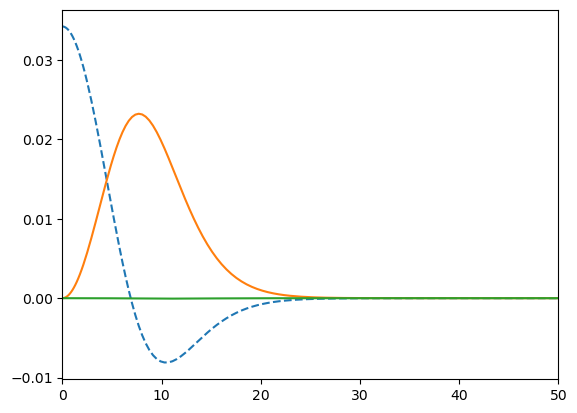

In [13]:
plt.plot(rval, X3valores[0], ls='--')
plt.plot(rval, X3valores[1]*rval**2)
plt.plot(rval, X3valores[2]*rval**4)

plt.xlim(0,50)

In [14]:
### Condiciones iniciales
# Totas las derivadas son ceros

y11, y12, y13 = 0, 0 # BoundY1[0], BoundY1[1], BoundY1[2]
y21, y22, y23 = 0, 0 # BoundY2[0], BoundY2[1], BoundY2[2]
y31, y32, y33 = 0, 0 # BoundY3[0], BoundY3[1], BoundY3[2]
#0, 0, 0, 0, 0, 0, 0, 0, 0

# x11 -> 2*trian^{-1}(sig0*r^{J-2}*A^{J−2}), x12 -> 2*trian^{-1}(sig0*r^{J}*A^{J}), x13 -> 2*trian^{-1}(sig0*r^{J+2}*A^{J+2})
# x21 -> A^{J−2}/r^{J-2}, x12 -> A^{J}/r^{J}, x13 -> A^{J+2}/r^{J+2}
# x31 -> B^{J−2}/r^{J-2}, x32 -> B^{J}/r^{J}, x33 -> B^{J+2}/r^{J+2}
JJ = 2
rval = r_dis[1:Nptos]

x11, x12, x13 = X1valores[0][0], X1valores[1][0], X1valores[2][0] 
x21, x22, x23 = X2valores[0][0], X2valores[1][0], X2valores[2][0]
x31, x32, x33 = X3valores[0][0], X3valores[1][0], X3valores[2][0]

In [46]:
# resolviendo
lam = Auto_Valores[J][autoV]
rmin, rmax = rval[0], rval[-1]
arg = [JJ, lam, fsN, fuN]

rspan = np.linspace(rmin, rmax, 10000)

U0 = [y11, y12, y13, y21, y22, y23, y31, y32, y33, x11, x12, x13, x21, x22,\
         x23, x31, x32, x33]

sol_ = solve_ivp(systFirstOrder, [rmin, rmax], U0, args=([arg]), t_eval=rspan,
                 method='DOP853', rtol=1e-10, atol=1e-14)  # DOP853 RK45

(-0.1, 0.15)

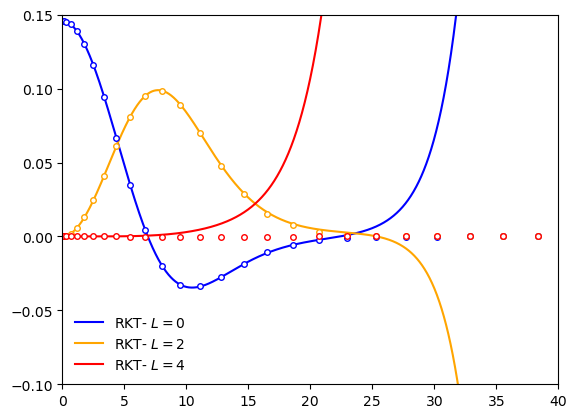

In [65]:
plt.plot(sol_.t, np.real(sol_.y[-3]*cte)*sol_.t**0, '-', color = 'blue',
               label = r'RKT- $L=0$')
plt.plot(sol_.t, np.real(sol_.y[-2]*cte)*sol_.t**2, '-', color = 'orange',
               label = r'RKT- $L=2$')
plt.plot(sol_.t, np.real(sol_.y[-1]*cte)*sol_.t**4, '-', color = 'red',
               label = r'RKT- $L=4$')


plt.plot(r_dis[1:Nptos:4], np.real(datB[0]*cte)[::4], ls='',
         marker='o', markersize=4, c='blue', mfc='white')
plt.plot(r_dis[1:Nptos:4], np.real(datB[1]*cte)[::4], ls='',
         marker='o', markersize=4, c='orange', mfc='white')
plt.plot(r_dis[1:Nptos:4], np.real(datB[2]*cte)[::4], ls='',
         marker='o', markersize=4, c='red', mfc='white')

plt.legend(frameon=False)

plt.xlim(0, 40)
plt.ylim(-1e-01, 0.15)